# ORIE 4580: Bertrand's paradox 
#### *Sid Banerjee, Cornell*


Notebook demonstrating Bertrand's paradox

See [Wikipedia article](https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)) for details of the problem.


In [100]:
# Make sure we have the packages we need
import numpy as np
import scipy as sc
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

#### Main simulation functions

In [101]:
def get_chords_from_midpoints(midpoints,r=1):
    """
    Returns endpoints of chords with given midpoints.
    Parameters
    ----------
    midpoints: list of tuples of chord midpoints
    r: radius of circle (default 1)    
    Returns
    ----------
    chords: list of length n
            each element comprises list of tuples representing enpoints of chord i
    """
    chords = []
    for i in range(len(midpoints)):
        (x0,y0) = midpoints[i]
        m = -x0/y0
        c = y0 + x0**2/y0
        A, B, C = m**2 + 1, 2*m*c, c**2 - r**2
        d = np.sqrt(B**2 - 4*A*C)
        x = np.array( ((-B + d), (-B - d))) / 2 / A
        y = m*x + c
        chords.append(list(zip(x, y)))
    return chords


def bertrand_unif_endpoint(n,r=1):
    """Generate random chords by selecting pairs of uniform random points 
    on the circumference of the circle

    Parameters
    ----------
    n: number of chords 
    r: radius of circle (default 1)    
        
    Returns
    ----------
    chords: list of length n
            each element comprises list of tuples representing enpoints of chord i
    midpoints: list of tuples of chord midpoints
    """
    angles = np.random.random((n,2)) * 2.0 * np.pi
    chords = []
    midpoints = []
    for i in range(n):
      chords.append(list(zip(r * np.cos(angles[i]), r* np.sin(angles[i]))))
      midpoints.append(((chords[-1][0][0]+chords[-1][1][0])/2.0,(chords[-1][0][1]+chords[-1][1][1])/2.0))
    return chords, midpoints


def bertrand_unif_radius(n,r=1.0):
    """
    Generate random chord by selecting a point u.a.r. within circle 
    as the midpoint of the chord.
    Parameters
    ----------
    n: number of chords 
    r: radius of circle (default 1)    
    Returns
    ----------
    chords: list of length n
            each element comprises list of tuples representing enpoints of chord i
    midpoints: list of tuples of chord midpoints
    """
    angles = np.random.random(n) * 2.0 * np.pi
    radii = np.random.random(n) * r
    midpoints = list(zip(radii * np.cos(angles), radii * np.sin(angles))) 
    chords = get_chords_from_midpoints(midpoints)
    return chords, midpoints


def bertrand_unif_center(n,r=1):
    """
    Generate random chord by selecting a point u.a.r. within circle 
    as the midpoint of the chord.
    Parameters
    ----------
    n: number of chords 
    r: radius of circle (default 1)    
    Returns
    ----------
    chords: list of length n
            each element comprises list of tuples representing enpoints of chord i
    midpoints: list of tuples of chord midpoints
    """
    midpoints = []
    for i in range(n):
      rand_point = 2.0*np.random.random(2)-1.0
      while rand_point[0]**2+rand_point[1]**2>1.0:
        rand_point = np.random.random(2)
      midpoints.append((rand_point[0],rand_point[1]))  
    chords = get_chords_from_midpoints(midpoints)
    return chords, midpoints

#### Function for plotting data

In [157]:
def plot_bertrand(method_number,n,radius=1.0,centers=0):
    # Plot the chords and their midpoints (if centers = 1) 
    # on separate Axes for the selected method of picking a chord
    chords, midpoints = bertrand_methods[method_number][0](n,radius)

    if centers == 1:
      fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8),subplot_kw={'aspect': 'equal'})
    else:  
      fig, ax1 = plt.subplots(1,1,figsize=(8,8),subplot_kw={'aspect': 'equal'})
    
    # check if chord exceeds triangle length
    tlen = r * np.sqrt(3)
    success = [False] * n
    for i in range(n):
      [point_1, point_2] = chords[i]
      if (point_1[0]-point_2[0])**2+(point_1[1]-point_2[1])**2 > tlen**2:
        success[i] = True
    prob = np.sum(success)/n
    
    # limit number of chords plotted (for visibility)
    num_plot = min(100,n)
    for i in range(num_plot):
      [point_1, point_2] = chords[i]
      ax1.plot((point_1[0],point_2[0]),(point_1[1],point_2[1]),c=cmap(success[i]),lw=0.5)  

    theta = np.linspace(0, 2*np.pi, 100)
    x_circ_1 = 1.0*np.cos(theta)
    y_circ_1 = 1.0*np.sin(theta)
    ax1.plot(x_circ_1, y_circ_1,'m')

    if centers == 1:
      num_plot = min(1000,n)
      ax2.scatter([p[0] for p in midpoints[:num_plot]],[p[1] for p in midpoints[:num_plot]], color=cmap(success[:num_plot]),s=0.5)
      x_circ_2 = 0.5*np.cos(theta)
      y_circ_2 = 0.5*np.sin(theta)
      ax2.plot(x_circ_1, y_circ_1,'r')
      ax2.plot(x_circ_2, y_circ_2,'g')
      fig.suptitle('Chord-sampling Method: {}, Probability: {:0.2f}'.format(bertrand_methods[method_number][1],prob))
    else:
      plt.title('Chord-sampling Method: {}, Probability: {:0.2f}'.format(bertrand_methods[method_number][1],prob))

    plt.show()

#### Bertrand's paradox simulation (without displaying chord centers)

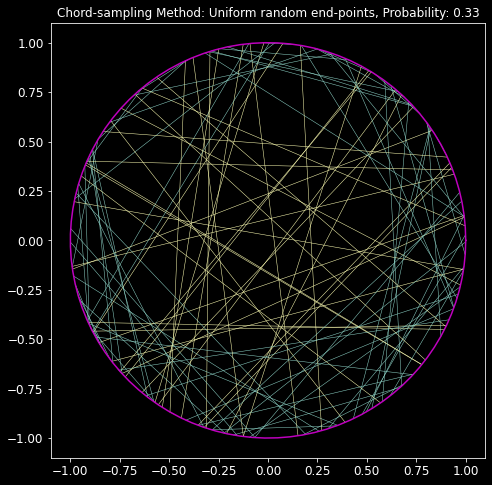

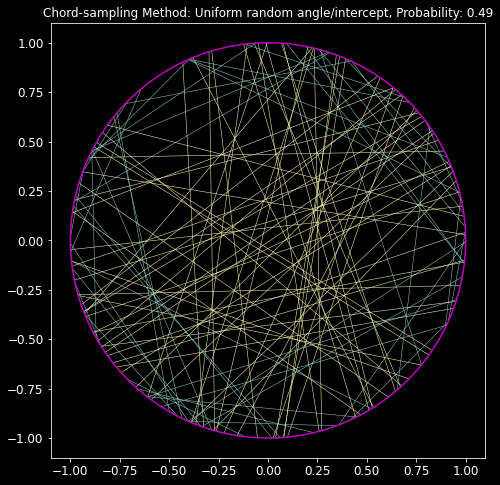

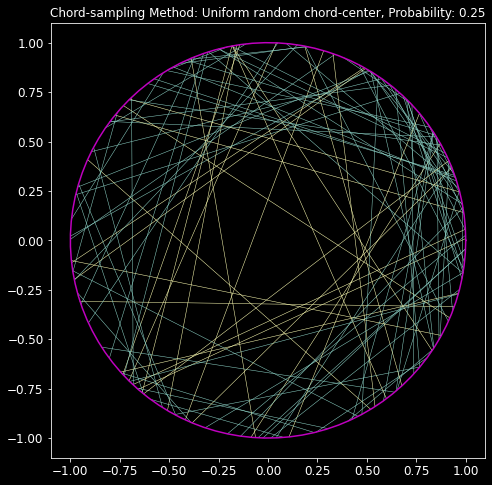

In [158]:
# Do the statistics using a sample size of nchords
nchords = 50000
# The circle radius. Doesn't matter what it is.
r = 1

np.random.seed(0)
bertrand_methods = {1: [bertrand_unif_endpoint,"Uniform random end-points"], 
                    2: [bertrand_unif_radius,"Uniform random angle/intercept"], 
                    3: [bertrand_unif_center,"Uniform random chord-center"]}

plot_bertrand(1,nchords,radius=r,centers=0)
print("\n")
plot_bertrand(2,nchords,radius=r,centers=0)
print("\n")
plot_bertrand(3,nchords,radius=r,centers=0)

#### Bertrand's paradox simulation (displaying chord centers)

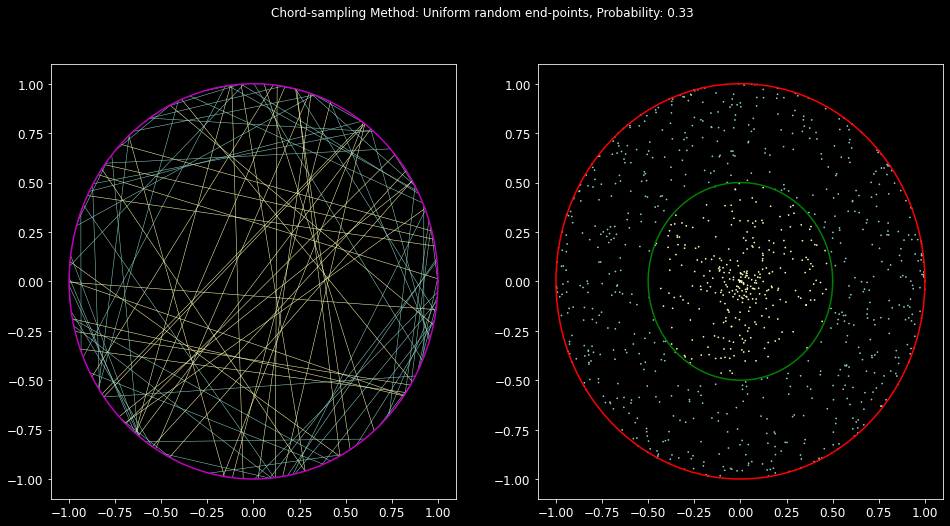

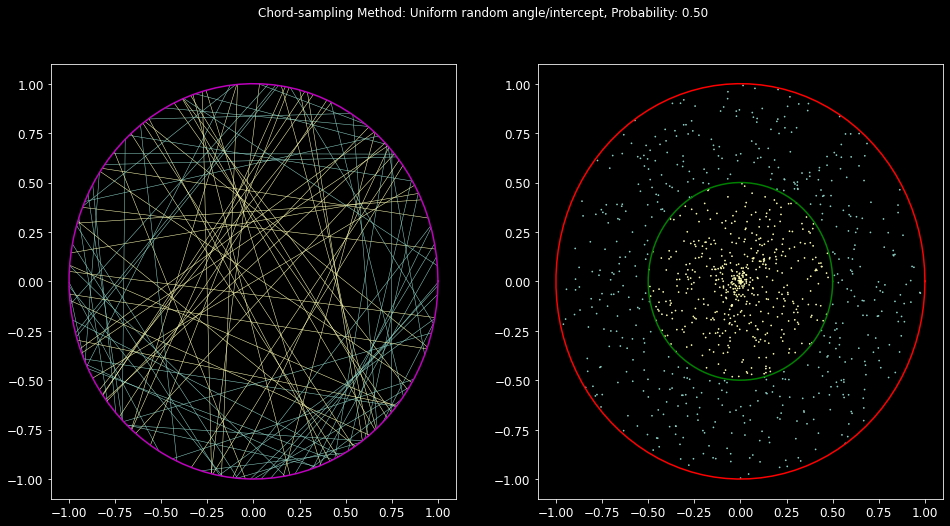

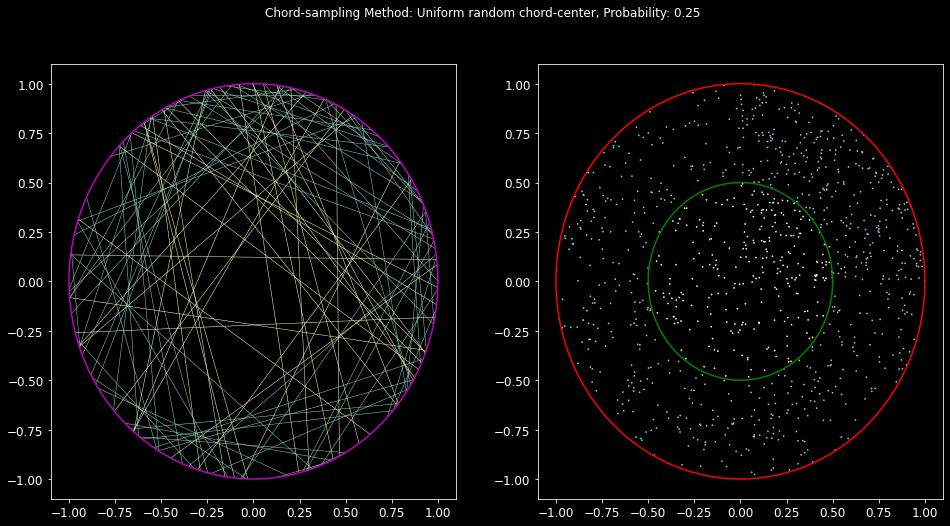

In [156]:
plot_bertrand(1,nchords,radius=r,centers=1)
print("\n")
plot_bertrand(2,nchords,radius=r,centers=1)
print("\n")
plot_bertrand(3,nchords,radius=r,centers=1)